In [1]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("day.csv",index_col='instant')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.dteday = pd.to_datetime(df.dteday)

In [4]:
df.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [5]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.4 KB


In [9]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
df.holiday.value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [12]:
df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

In [13]:
df.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [14]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

In [15]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Visualization

In [16]:
df_temp=df.drop(['casual','registered'], axis=1)

In [17]:
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis,norm, skew


 mu = 4504.35 and sigma = 1935.89



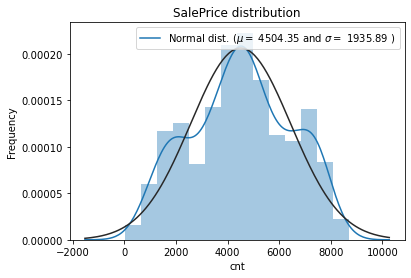

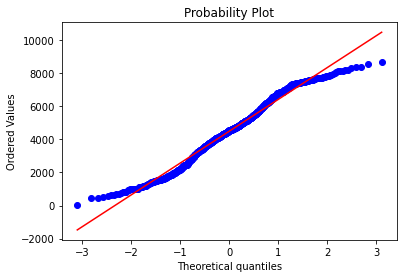

In [18]:
sns.distplot(df_temp.cnt , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_temp.cnt)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_temp.cnt, plot=plt)
plt.show()


# Checking Correlation

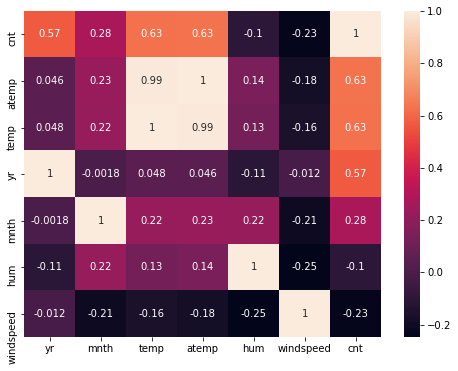

In [19]:
#checking for correlation with heatmap
trc=df_temp.corr().sort_values(by='cnt',axis=0,ascending=False)
plt.figure(figsize=(8,6))
sns.heatmap(trc,annot=True)
plt.show()


In [20]:
df_temp=df.drop(['windspeed','hum','dteday','casual','registered'], axis=1)

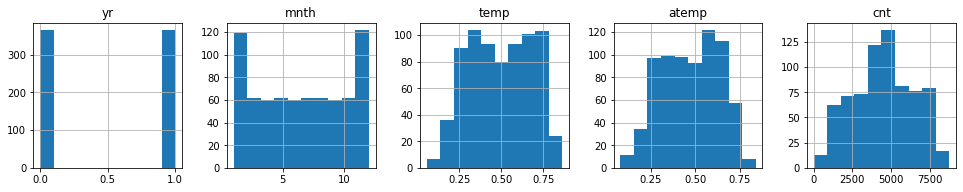

In [21]:
#checking train2 data histogram to for data skewness and kurtosis
df_temp.hist(figsize=(20,20), grid=True, layout=(6, 6), bins = 10)
plt.show()

In [22]:
numerical_features =['temp','cnt','yr']


In [23]:
numerical_features

['temp', 'cnt', 'yr']

In [24]:
df_temp.dtypes

season        category
yr               int64
mnth             int64
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
cnt              int64
dtype: object

In [25]:
categorical_features =[ 'season','holiday','weekday','holiday','workingday','weathersit']

In [26]:
categorical_features

['season', 'holiday', 'weekday', 'holiday', 'workingday', 'weathersit']

In [27]:
df_temp.dtypes


season        category
yr               int64
mnth             int64
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
cnt              int64
dtype: object

<AxesSubplot:>

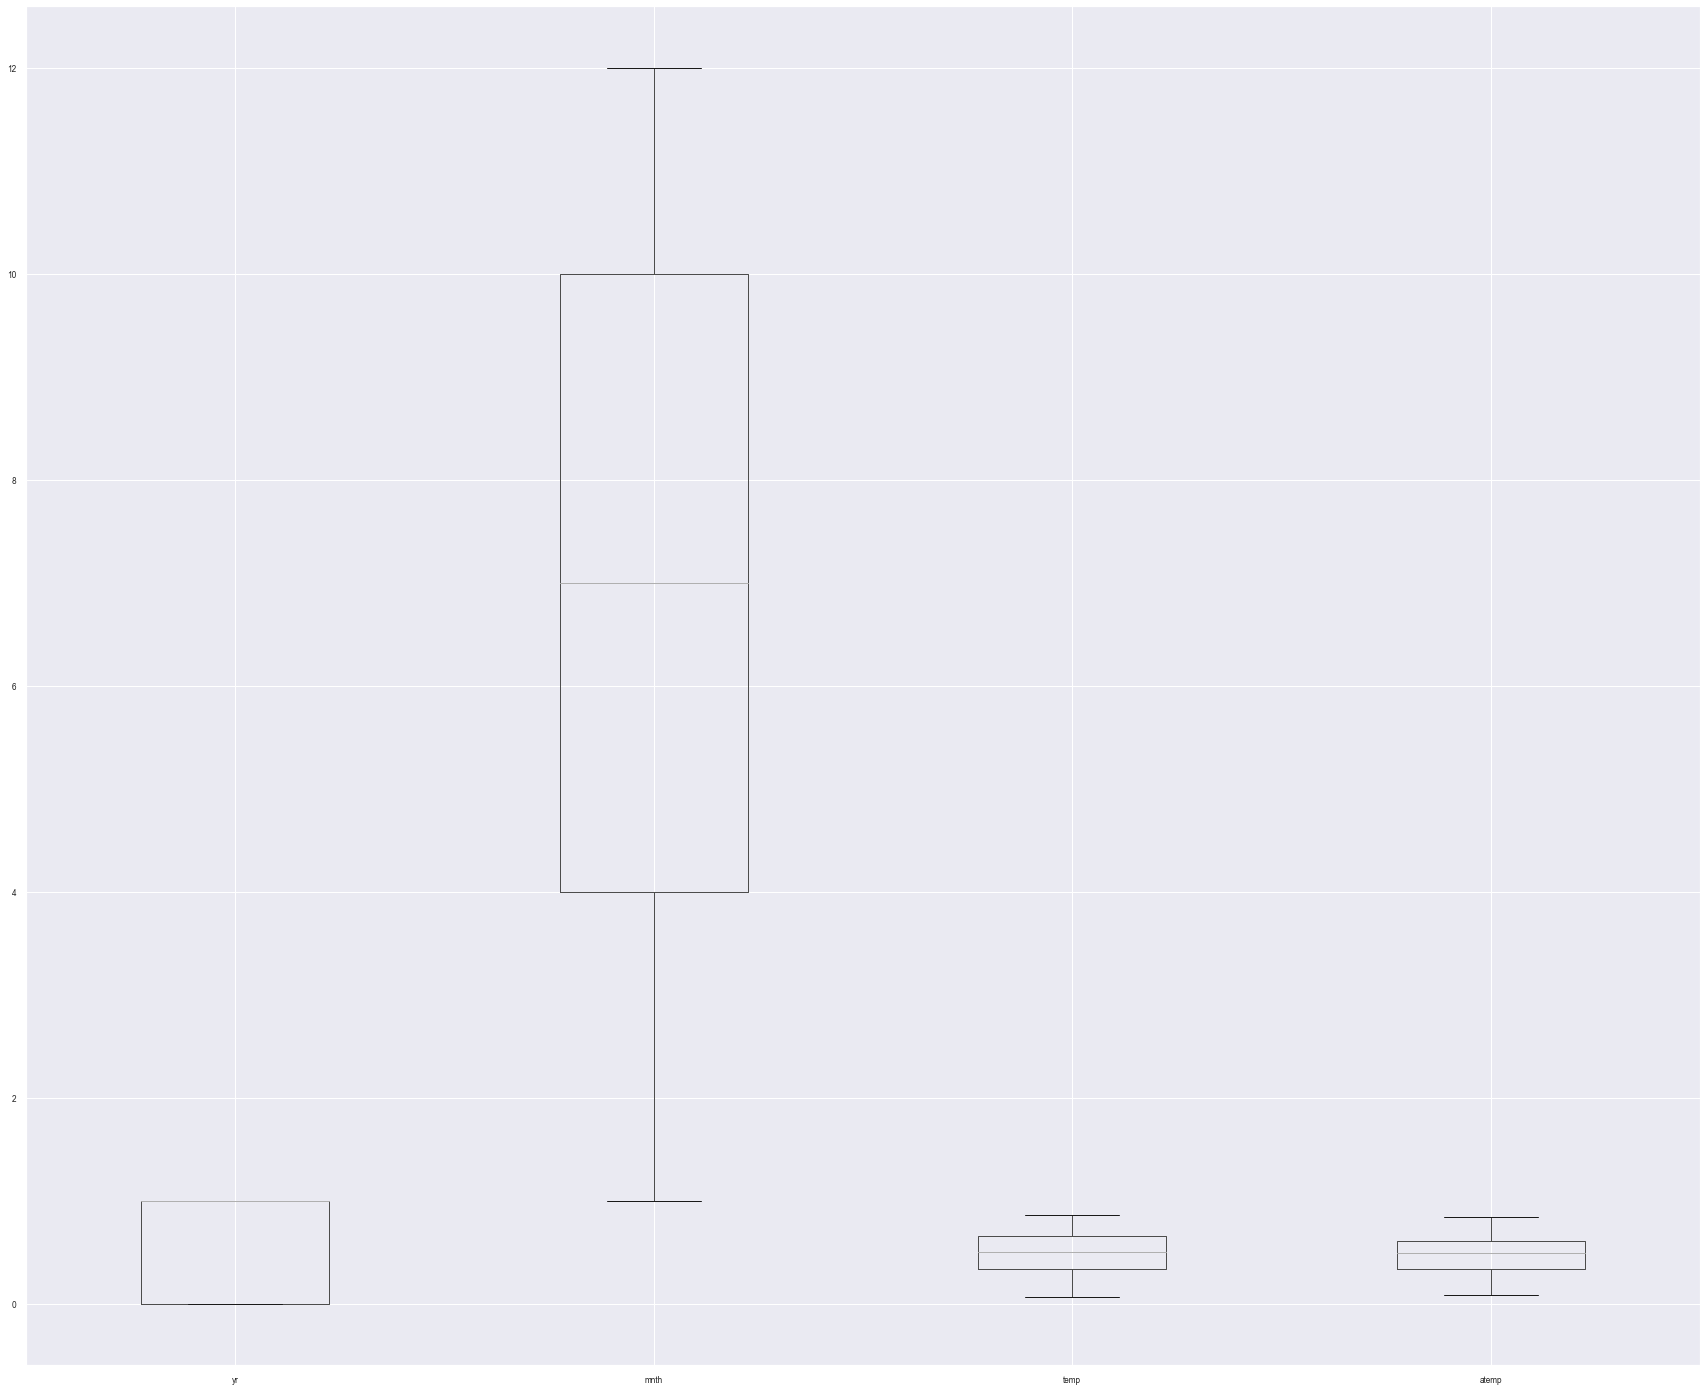

In [28]:
sns.set(font_scale=.75) 
df_temp.iloc[:,:-1].boxplot(rot = 0, figsize=(30,25))

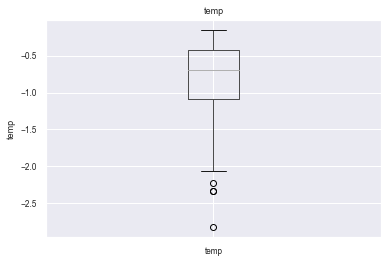

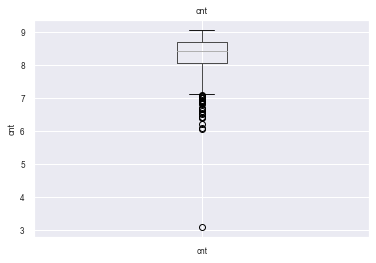

In [29]:
for feature in numerical_features :
    data=df_temp.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Checking the Skewness with 'numerical features'


In [30]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [31]:
skew_values = skew(df_temp[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,yr,-0.002736
1,cnt,-0.047256
0,temp,-0.054409


# Checking the Kurtosis with 'numerical features

In [32]:
kurtosis_value =kurtosis(df_temp[numerical_features])
dummy_k = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),
                   pd.DataFrame(list(kurtosis_value), columns=['Kurtosis Degree'])], axis=1)
dummy_k.sort_values(by ='Kurtosis Degree', ascending=False)

,Features,Kurtosis Degree
1,cnt,-0.814576
0,temp,-1.119423
2,yr,-1.999993


In [33]:
X=df_temp.iloc[:,:-1]
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp
instant,,,,,,,,,
1,1,0,1,0,6,0,2,0.344167,0.363625
2,1,0,1,0,0,0,2,0.363478,0.353739
3,1,0,1,0,1,1,1,0.196364,0.189405
4,1,0,1,0,2,1,1,0.200000,0.212122
5,1,0,1,0,3,1,1,0.226957,0.229270


In [34]:
y=df_temp.cnt
y.head()

instant
1     985
2     801
3    1349
4    1562
5    1600
Name: cnt, dtype: int64

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state=36)

In [36]:
X_train.shape

(584, 9)

# Cross Validation K-fold

In [37]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df_temp.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df_temp.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

# LinearRegression before scale

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None
)

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
ypredictlr=lr.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
lr_acc=round(r2_score(y_test, ypredictlr),2)
lr_acc

0.85

In [42]:
def get_rmse(y_test, pred):
    rmse = np.sqrt(mean_squared_error(y_test, pred, sample_weight=None, multioutput='uniform_average'))
    return rmse

In [43]:
from sklearn.metrics import mean_squared_error
lr_rmse=get_rmse(y_test,ypredictlr)
lr_rmse

759.1616524944166

In [44]:
ypred_train=lr.predict(X_train)

In [45]:
lr_mse=mean_squared_error(y_train,ypred_train)
lr_mse

843023.0183583121

In [46]:
from sklearn.metrics import mean_absolute_error
lr_mae=mean_absolute_error(y_test,ypredictlr)
lr_mae

592.4324677843914

In [47]:
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on test',rmse_CV_test(lr).mean())

rmse on train 957.8408280993965
rmse on test 741.9975179448735


In [48]:
lr_test_pre = lr.predict(X_test)
lr_train_pre = lr.predict(X_train)

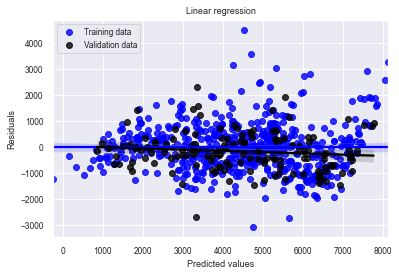

In [49]:
sns.regplot(lr_train_pre, lr_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lr_test_pre,lr_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SGDRegressor before scaled - bs

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
sgdc_bs=SGDRegressor(
    loss='squared_loss',
    alpha=0.25,
    #fit_intercept=False,
    max_iter=200,
    learning_rate='adaptive',
    #power_t=0.50,
    #validation_fraction=0.50,
    #class_weight='balanced',
    eta0=0.50
    
)

In [52]:
sgdc_bs.fit(X_train,y_train)

SGDRegressor(alpha=0.25, eta0=0.5, learning_rate='adaptive', max_iter=200)

In [53]:
ypredictsgdc_bs=sgdc_bs.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
sgdc_bs_acc=r2_score(y_test, ypredictsgdc_bs)

In [55]:
sgdc_bs_acc

0.5963861793401268

# Standard Scaler

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [58]:
X = pca.fit(X_train)

In [59]:
explained_variance = pca.explained_variance_ratio_

In [60]:
print(X.components_)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00  1.44328993e-15  2.77555756e-16
  -2.42861287e-16  8.60422844e-16  6.93889390e-17 -1.66533454e-16
  -3.46944695e-18]
 [ 0.00000000e+00 -1.58676977e-15  1.00000000e+00 -2.05693163e-16
  -2.62192193e-16 -1.24251705e-15  5.51960266e-16  7.48466559e-17
   1.41345752e-16]
 [ 0.00000000e+00 -2.19911599e-16  1.30607790e-16  1.00000000e+00
   7.65120797e-16 -6.96434464e-16 -2.43993436e-17  2.61215580e-16
   1.61965754e-16]
 [ 0.00000000e+00  2.62349806e-16  6.03007171e-17 -8.44271060e-16
   1.00000000e+00 -8.13158850e-16  7.69216064e-17 -1.62158492e-16
   1.27974074e-16]
 [-0.00000000e+00 -8.40883353e-16  1.39565818e-15  3.65096324e-16
   8.55419772e-16  1.00000000e+00  1.37931400e-15  3.55764606e-16
  -3.00314673e-16]
 [-0.00000000e+00 -6.99341959e-17 -5.60734959e-16 -1.52672859e-16
  -8.45720678e-17 -1.1250589

In [61]:
explained_variance.shape

(9,)

# ElasticNet

In [62]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [63]:
#X_train, y_train = make_regression(n_features=1,random_state=0)
en = ElasticNet(
    alpha=0.001,
    l1_ratio=0.10,
    max_iter=1000,
    random_state=0)

In [64]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=0)

In [65]:
ypredicten=en.predict(X_test)

In [66]:
from sklearn.metrics import r2_score
en_acc=round(r2_score(y_test, ypredicten),2)

In [67]:
en_acc

0.85

In [68]:
from sklearn.metrics import mean_squared_error
en_mse=mean_squared_error(y_test,ypredicten) 
en_mse

576758.984578663

In [69]:
from sklearn.metrics import mean_absolute_error
en_mae=mean_absolute_error(y_test,ypredicten) 
en_mae

592.6394160526588

In [70]:
en.score(X_test,y_test)

0.8490229238652474

In [71]:
from sklearn.metrics import mean_squared_error
en_rmse=get_rmse(y_test,ypredicten)
en_rmse

759.4464988257323

In [72]:
from sklearn.metrics import mean_absolute_error
en_mae=mean_absolute_error(y_test,ypredicten) 
en_mae

592.6394160526588

In [73]:
print('rmse on train',rmse_CV_train(en).mean())
print('rmse on train',rmse_CV_test(en).mean())

rmse on train 949.8203858923719
rmse on train 740.9399530289002


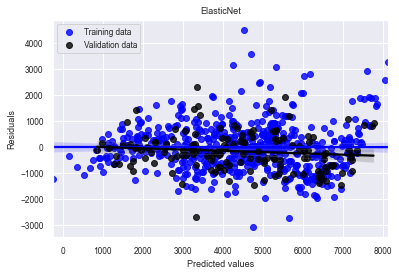

In [74]:
en_test_pre = en.predict(X_test)
en_train_pre = en.predict(X_train)
sns.regplot(en_train_pre, en_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(en_test_pre,en_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
lr_scaled=LinearRegression()

In [76]:
lr_scaled.fit(X_train,y_train)

LinearRegression()

In [77]:
ypredictlr_scaled=lr_scaled.predict(X_test)

In [78]:
from sklearn.metrics import r2_score
lr_scaled_acc=round(r2_score(y_test, ypredictlr_scaled),2)
lr_scaled_acc

0.85

In [79]:
mean_squared_error(y_test,ypredictlr_scaled) 

576326.4146180531

In [80]:
lr_scaled.score(X_test,y_test)

0.8491361568613911

In [81]:
lr_scaled.score(X_train,y_train)

0.7737931157156068

In [82]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,ypredictlr_scaled)

0.06135104750443826

In [83]:
get_rmse(y_test,ypredictlr_scaled)

759.1616524944164

In [84]:
#getting root mean square error
lr_scaled_rmse=get_rmse(y_test,ypredictlr_scaled)
lr_scaled_rmse

759.1616524944164

In [85]:
from sklearn.metrics import mean_squared_error
lr_scaled_mse=mean_squared_error(y_test,ypredictlr_scaled) 
lr_scaled_mse

576326.4146180531

In [86]:
from sklearn.metrics import mean_absolute_error
lr_scaled_mae=mean_absolute_error(y_test,ypredicten) 
lr_scaled_mae

592.6394160526588

In [87]:
print('rmse on train',rmse_CV_train(lr_scaled).mean())
print('rmse on test',rmse_CV_test(lr_scaled).mean())

rmse on train 957.8408280993959
rmse on test 741.9975179448738


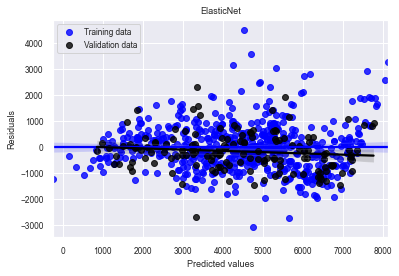

In [88]:
lr_scaled_test_pre = lr_scaled.predict(X_test)
lr_scaled_train_pre = lr_scaled.predict(X_train)
sns.regplot(lr_scaled_train_pre, lr_scaled_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lr_scaled_test_pre,lr_scaled_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SVR

In [89]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [90]:
ypredictsvr = svr.predict(X_test)

In [91]:
from sklearn.metrics import r2_score
svr_acc=round(r2_score(y_test, ypredictsvr),2)
svr_acc

0.03

In [92]:
mean_squared_error(y_test,ypredictsvr) 

3697457.2504009

In [93]:
svr.score(X_train,y_train)

0.030209315773250145

In [94]:
svr.score(X_test,y_test)

0.03212381649057139

In [95]:
#getting root mean square error
svr_rmse=get_rmse(y_test,ypredictsvr)
svr_rmse

1922.8773362856248

In [96]:
svr_mae=mean_absolute_error(y_test,ypredictsvr) 
svr_mae

1606.8617137620865

In [97]:
svr_mse=mean_squared_error(y_test,ypredictsvr)
svr_mse

3697457.2504009

In [98]:
print('rmse on train',rmse_CV_train(svr).mean())
print('rmse on test',rmse_CV_test(svr).mean())

rmse on train 1908.754834258943
rmse on test 1978.3989501580895


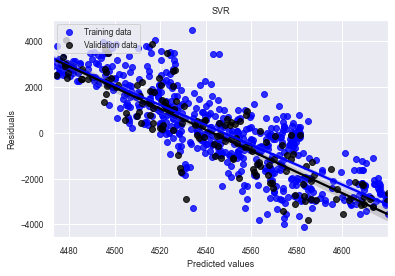

In [99]:
svr_test_pre = svr.predict(X_test)
svr_train_pre = svr.predict(X_train)
sns.regplot(svr_train_pre, svr_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(svr_test_pre,svr_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("SVR")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# MLPRegressor

In [100]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    activation='identity',
    batch_size=400,
    max_iter=500,
    max_fun=5000,
    learning_rate_init=0.10
    
)

In [101]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='identity', batch_size=400, learning_rate_init=0.1,
             max_fun=5000, max_iter=500)

In [102]:
ypredictmlp = mlp.predict(X_test)

In [103]:
from sklearn.metrics import r2_score
mlp_acc=round(r2_score(y_test, ypredictmlp),2)
mlp_acc

0.85

In [104]:
mean_squared_error(y_test,ypredictmlp) 

566825.9647728244

In [105]:
mlp.score(X_train,y_train)

0.766467045305667

In [106]:
mlp.score(X_test,y_test)

0.8516230711149164

In [107]:
#getting root mean square error
mlp_rmse=get_rmse(y_test,ypredictmlp)
mlp_rmse

752.8784528546586

In [108]:
mlp_mse=mean_squared_error(y_test,ypredictmlp)
mlp_mse

566825.9647728244

In [109]:
mlp_mae=mean_absolute_error(y_test,ypredictmlp) 
mlp_mae

587.3528278547489

In [110]:
print('rmse on train',rmse_CV_train(mlp).mean())
print('rmse on test',rmse_CV_test(mlp).mean())

rmse on train 980.7873431266322
rmse on test 2805.7232907994135


In [111]:
mlp_test_pre = mlp.predict(X_test)
mlp_train_pre = mlp.predict(X_train)

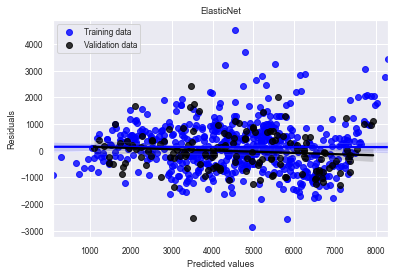

In [112]:
sns.regplot(mlp_train_pre, mlp_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(mlp_test_pre,mlp_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Lasso

In [113]:
from sklearn.linear_model import Lasso
lasso=Lasso(
    selection='random',
    normalize=False,
    fit_intercept=True,
    alpha=0.50,
    max_iter=250,
    tol=0.10
)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, max_iter=250, selection='random', tol=0.1)

In [114]:
ypredictls=lasso.predict(X_test)

In [115]:
from sklearn.metrics import r2_score
ls_acc=round(r2_score(y_test, ypredictls),2)
ls_acc

0.85

In [116]:
mean_squared_error(y_test,ypredictls)

579402.6423347801

In [117]:
lasso.score(X_train,y_train)

0.7735322919349111

In [118]:
lasso.score(X_test,y_test)

0.8483308987230451

In [119]:
#getting root mean square error
ls_rmse=get_rmse(y_test,ypredictls)
ls_rmse

761.1850250331913

In [120]:
ls_mse=mean_squared_error(y_test,ypredictls)
ls_mse

579402.6423347801

In [121]:
ls_mae=mean_absolute_error(y_test,ypredictls) 
ls_mae

594.6304899322663

In [122]:
print('rmse on train',rmse_CV_train(lasso).mean())
print('rmse on test',rmse_CV_test(lasso).mean())

rmse on train 955.2003136305159
rmse on test 867.7887888956427


In [123]:
ls_test_pre = lasso.predict(X_test)
ls_train_pre = lasso.predict(X_train)

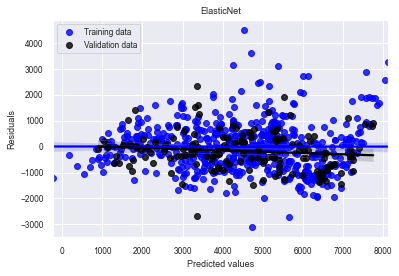

In [124]:
sns.regplot(ls_train_pre, ls_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(ls_test_pre,ls_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Ridge

In [125]:
from sklearn.linear_model import Ridge
ridge=Ridge(
    solver='svd',
    alpha=0.50,
    max_iter=250,
    tol=0.10
)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, max_iter=250, solver='svd', tol=0.1)

In [126]:
ypredictrd=ridge.predict(X_test)

In [127]:
from sklearn.metrics import r2_score
rd_acc=round(r2_score(y_test, ypredictrd),2)
rd_acc

0.85

In [128]:
mean_squared_error(y_test,ypredictrd)

576738.5973404985

In [129]:
ridge.score(X_train,y_train)

0.7737906756967272

In [130]:
ridge.score(X_test,y_test)

0.8490282605928768

In [131]:
#getting root mean square error
rd_rmse=get_rmse(y_test,ypredictrd)
rd_rmse

759.4330762749925

In [132]:
rd_mse=mean_squared_error(y_test,ypredictrd)
rd_mse

576738.5973404985

In [133]:
rd_mae=mean_absolute_error(y_test,ypredictrd) 
rd_mae

592.630165302245

In [134]:
print('rmse on train',rmse_CV_train(ridge).mean())
print('rmse on test',rmse_CV_test(ridge).mean())

rmse on train 948.822207223838
rmse on test 737.1904682189044


In [135]:
rd_test_pre = ridge.predict(X_test)
rd_train_pre = ridge.predict(X_train)

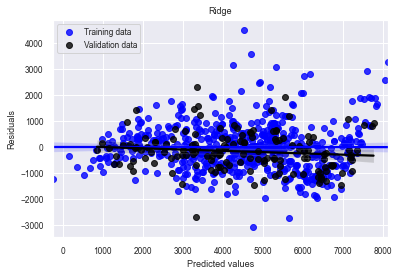

In [136]:
sns.regplot(rd_train_pre, rd_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(rd_test_pre,rd_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# ExtraTreesRegressor

In [137]:
from sklearn.ensemble import ExtraTreesRegressor

In [138]:
etc = ExtraTreesRegressor(
    n_estimators=10)
etc.fit(X_train, y_train)
print(etc.feature_importances_)

[0.41233733 0.0940171  0.02328131 0.31744351 0.03099112 0.03969246
 0.018457   0.03779921 0.02598096]


In [139]:
ypredictetc=etc.predict(X_test)

In [140]:
from sklearn.metrics import r2_score
etc_acc=round(r2_score(y_test, ypredictetc),2)
etc_acc

0.87

In [141]:
mean_squared_error(y_test,ypredictetc)

493545.3870068027

In [142]:
etc.score(X_train,y_train)

1.0

In [143]:
etc.score(X_test,y_test)

0.8708055852402258

In [144]:
#getting root mean square error
etc_rmse=get_rmse(y_test,ypredictetc)
etc_rmse

702.5278549686145

In [145]:
etc_mse=mean_squared_error(y_test,ypredictetc)
etc_mse

493545.3870068027

In [146]:
etc_mae=mean_absolute_error(y_test,ypredictetc) 
etc_mae

481.1367346938776

In [147]:
print('rmse on train',rmse_CV_train(etc).mean())
print('rmse on test',rmse_CV_test(etc).mean())

rmse on train 792.4625617622775
rmse on test 731.2103484824326


In [148]:
etc_test_pre = etc.predict(X_test)
etc_train_pre = etc.predict(X_train)

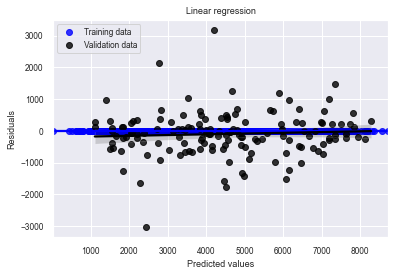

In [149]:
sns.regplot(etc_train_pre, etc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(etc_test_pre,etc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# XGBRegressor

In [150]:
from xgboost import XGBRegressor

In [151]:
xgb = XGBRegressor(
    booster='gblinear',
    #gamma=0.05,
    #max_depth=4,
    learning_rate=0.10,
    feature_selector='cyclic',
    updater='coord_descent',
    eval_metric='rmse'
)
xgb.fit(X_train,y_train)
ypredictxgb= xgb.predict(X_test)

In [152]:
from sklearn.metrics import r2_score
xgb_acc=round(r2_score(y_test, ypredictxgb),2)
xgb_acc

0.85

In [153]:
mean_squared_error(y_test,ypredictxgb)


576373.3510511175

In [154]:
xgb.score(X_train,y_train)

0.773793107511119

In [155]:
xgb.score(X_test,y_test)

0.8491238704027181

In [156]:
#getting root mean square error
xgb_rmse=get_rmse(y_test,ypredictxgb)
xgb_rmse

759.1925651974718

In [157]:
xgb_mse=mean_squared_error(y_test,ypredictxgb)
xgb_mse

576373.3510511175

In [158]:
xgb_mae=mean_absolute_error(y_test,ypredictxgb) 
xgb_mae

592.4654619904602

In [159]:
print('rmse on train',rmse_CV_train(xgb).mean())
print('rmse on test',rmse_CV_test(xgb).mean())

rmse on train 957.8687524883935
rmse on test 1077.7842556853536


In [160]:
xgb_test_pre = xgb.predict(X_test)
xgb_train_pre = xgb.predict(X_train)

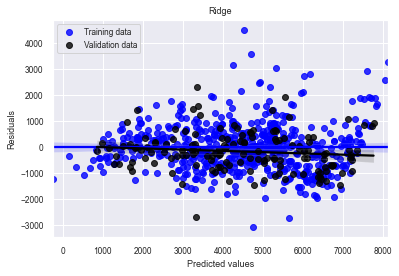

In [161]:
sns.regplot(xgb_train_pre, xgb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(xgb_test_pre,xgb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SGDRegressor

In [162]:
from sklearn.linear_model import SGDRegressor

In [163]:
sgdc=SGDRegressor(
    loss='squared_loss',
    alpha=0.25,
    #fit_intercept=False,
    max_iter=200,
    learning_rate='adaptive',
    #power_t=0.50,
    #validation_fraction=0.50,
    #class_weight='balanced',
    eta0=0.50
    
)

In [164]:
sgdc.fit(X_train,y_train)

SGDRegressor(alpha=0.25, eta0=0.5, learning_rate='adaptive', max_iter=200)

In [165]:
ypredictsgdc=sgdc.predict(X_test)

In [166]:
from sklearn.metrics import r2_score
sgdc_acc=round(r2_score(y_test, ypredictsgdc),2)
sgdc_acc

0.82

In [167]:
sgdc.score(X_train,y_train)

0.7538528545630446

In [168]:
sgdc.score(X_test,y_test)

0.8179944122926947

In [169]:
#getting root mean square error
sgdc_rmse=get_rmse(y_test,ypredictsgdc)
sgdc_rmse

833.8425247365393

In [170]:
sgdc_mse=mean_squared_error(y_test,ypredictsgdc)
sgdc_mse

695293.3560590062

In [171]:
sgdc_mae=mean_absolute_error(y_test,ypredictsgdc) 
sgdc_mae

637.6910226965032

In [172]:
sgdc_test_pre = sgdc.predict(X_test)
sgdc_train_pre = sgdc.predict(X_train)
print('rmse on train',rmse_CV_train(sgdc).mean())
print('rmse on test',rmse_CV_test(sgdc).mean())

rmse on train 972.1744160328624
rmse on test 761.656269747322


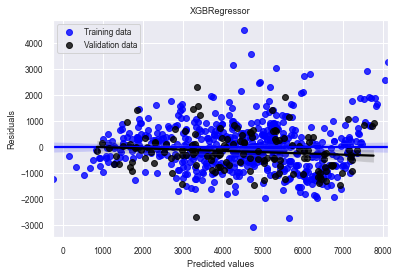

In [173]:
sns.regplot(xgb_train_pre, xgb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(xgb_test_pre,xgb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("XGBRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# LiteGBM

In [174]:
from lightgbm import LGBMRegressor

In [175]:
lgbm=LGBMRegressor(
    boosting_type='gbdt',
    max_depth=16,
    learning_rate=0.25,
    num_leaves=64
)

In [176]:
lgbm.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.25, max_depth=16, num_leaves=64)

In [177]:
ypredictlgbm=lgbm.predict(X_test)

In [178]:
from sklearn.metrics import r2_score
lgbm_acc=round(r2_score(y_test, ypredictlgbm),2)
lgbm_acc

0.87

In [179]:
mean_squared_error(y_test,ypredictlgbm)

506983.7927377139

In [180]:
lgbm.score(X_train,y_train)

0.995882928026381

In [181]:
lgbm.score(X_test,y_test)

0.8672878399438129

In [182]:
#getting root mean square error
lgbm_rmse=get_rmse(y_test,ypredictlgbm)
lgbm_rmse

712.0279437899287

In [183]:
lgbm_mse=mean_squared_error(y_test,ypredictlgbm)
lgbm_mse

506983.7927377139

In [184]:
lgbm_mae=mean_absolute_error(y_test,ypredictlgbm) 
lgbm_mae

513.7984408868649

In [185]:
print('rmse on train',rmse_CV_train(lgbm).mean())
print('rmse on test',rmse_CV_test(lgbm).mean())

rmse on train 828.9735245652013
rmse on test 760.6825532321509


In [186]:
lgbm_test_pre = lgbm.predict(X_test)
lgbm_train_pre = lgbm.predict(X_train)

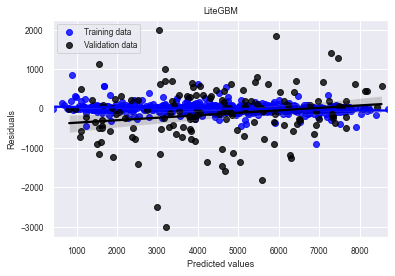

In [187]:
sns.regplot(lgbm_train_pre, lgbm_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lgbm_test_pre,lgbm_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("LiteGBM")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# GradientBoostingRegressor

In [188]:
from sklearn.ensemble import GradientBoostingRegressor

In [189]:
gbc = GradientBoostingRegressor(
    #loss='deviance',
    criterion='mse',
    learning_rate=0.25,
    n_estimators=200,
    subsample=0.50,
    max_features='sqrt',
    max_depth=16,
    verbose=0
)
gbc.fit(X_train, y_train)


GradientBoostingRegressor(criterion='mse', learning_rate=0.25, max_depth=16,
                          max_features='sqrt', n_estimators=200, subsample=0.5)

In [190]:
ypredictgbc=gbc.predict(X_test)

In [191]:
from sklearn.metrics import r2_score
gbc_acc=round(r2_score(y_test, ypredictgbc),2)
gbc_acc

0.83

In [192]:
mean_squared_error(y_test,ypredictgbc)

643407.7648387142

In [193]:
#getting root mean square error
gbc_rmse=get_rmse(y_test,ypredictgbc)
gbc_rmse

802.1270253761022

In [194]:
gbc_mse=mean_squared_error(y_test,ypredictgbc)
gbc_mse

643407.7648387142

In [195]:
gbc_mae=mean_absolute_error(y_test,ypredictgbc) 
gbc_mae

591.5569602781461

In [196]:
print('rmse on train',rmse_CV_train(gbc).mean())
print('rmse on test',rmse_CV_test(gbc).mean())

rmse on train 887.7070480446288
rmse on test 824.2204600925522


In [197]:
gbc_test_pre = gbc.predict(X_test)
gbc_train_pre = gbc.predict(X_train)

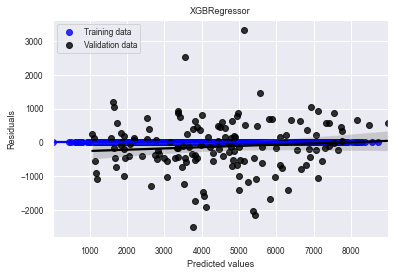

In [198]:
sns.regplot(gbc_train_pre, gbc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(gbc_test_pre,gbc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("XGBRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# CatBoostRegressor

In [199]:
from catboost import CatBoostRegressor
cb=CatBoostRegressor(
    loss_function="RMSE",
    task_type="CPU",
    learning_rate=0.10,
    iterations=500,
    l2_leaf_reg=5,
    depth=7,
    silent=True
                                                   
)
cb.fit(X_train,y_train)

In [200]:
ypredictcb=cb.predict(X_test)

In [201]:
from sklearn.metrics import r2_score
cb_acc=round(r2_score(y_test, ypredictcb),2)
cb_acc

0.87

In [202]:
mean_squared_error(y_test,ypredictcb)

480238.2753901078

In [203]:
cb.score(X_train,y_train)

0.9956859877798269

In [204]:
cb.score(X_test,y_test)

0.8742889619320602

In [205]:
#getting root mean square error
cb_rmse=get_rmse(y_test,ypredictcb)
cb_rmse

692.9922621430255

In [206]:
cb_mse=mean_squared_error(y_test,ypredictcb)
cb_mse

480238.2753901078

In [207]:
cb_mae=mean_absolute_error(y_test,ypredictcb) 
cb_mae

469.9831747153511

In [208]:
print('rmse on train',rmse_CV_train(cb).mean())
print('rmse on test',rmse_CV_test(cb).mean())
cb_test_pre = cb.predict(X_test)
cb_train_pre = cb.predict(X_train)

rmse on train 783.792528984677
rmse on test 788.4457211408023


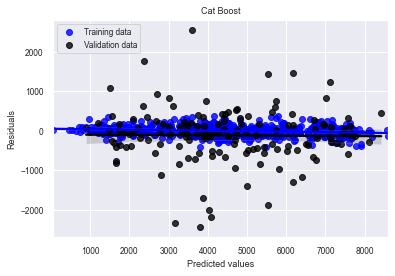

In [209]:
sns.regplot(cb_train_pre, cb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(cb_test_pre,cb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Cat Boost")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# KNN

In [210]:
from sklearn.neighbors import KNeighborsRegressor

In [211]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [212]:
ypredictknn = knn.predict(X_test)
from sklearn.metrics import r2_score
knn_acc=round(r2_score(y_test, ypredictknn),2)
knn_acc

0.86

In [213]:
mean_squared_error(y_test,ypredictknn)

543066.106122449

In [214]:
#getting root mean square error
knn_rmse=get_rmse(y_test,ypredictknn)
knn_rmse

736.9301908067338

In [215]:
knn_mse=mean_squared_error(y_test,ypredictknn)
knn_mse

543066.106122449

In [216]:
knn_mae=mean_absolute_error(y_test,ypredictknn) 
knn_mae

490.66394557823133

In [217]:
print('rmse on train',rmse_CV_train(knn).mean())
print('rmse on test',rmse_CV_test(knn).mean())

rmse on train 859.4982720603681
rmse on test 835.632178374092


In [218]:
knn_test_pre = knn.predict(X_test)
knn_train_pre = knn.predict(X_train)

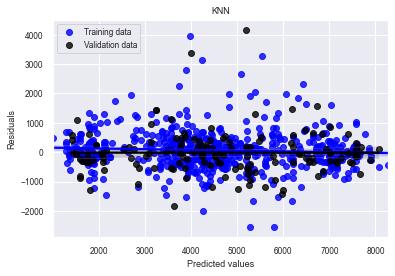

In [219]:
sns.regplot(knn_train_pre, knn_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(knn_test_pre,knn_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("KNN")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Random Forest Regressor

In [220]:
from sklearn.ensemble import RandomForestRegressor

In [221]:
rfc=RandomForestRegressor(
    n_estimators=120,
    max_depth=25,
    random_state=25
)
rfc.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=120, random_state=25)

In [222]:
ypredictrfc = rfc.predict(X_test)
from sklearn.metrics import r2_score
rfc_acc=round(r2_score(y_test, ypredictrfc),2)
rfc_acc

0.87

In [223]:
from sklearn.metrics import mean_squared_log_error
rfc_rmse=get_rmse(y_test,ypredictrfc)
rfc_rmse

702.7747149174112

In [224]:
rfc_mse=mean_squared_error(y_test,ypredictrfc)
rfc_mse

493892.2999272486

In [225]:
rfc_mae=mean_absolute_error(y_test,ypredictrfc) 
rfc_mae

480.3662131519274

In [226]:
print('rmse on train',rmse_CV_train(rfc).mean())
print('rmse on test',rmse_CV_test(rfc).mean())

rmse on train 787.535198318677
rmse on test 793.3612820897181


In [227]:
rfc_test_pre = rfc.predict(X_test)
rfc_train_pre = rfc.predict(X_train)

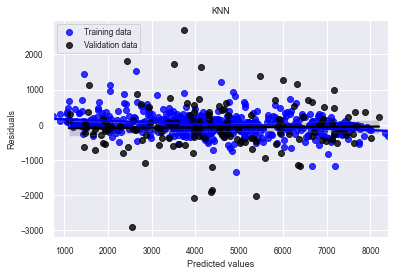

In [228]:
sns.regplot(rfc_train_pre, rfc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(rfc_test_pre,rfc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("KNN")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Model Performance

In [229]:
index=['Accuracy','RMSE','MSE','MAE']
test_perf_data = pd.DataFrame({'LR':[lr_acc,lr_rmse,lr_mse,lr_mae], 
                     'ElasticNet':[en_acc,en_rmse,en_mse,en_mae],
                     'LR scaled':[lr_scaled_acc,lr_scaled_rmse,lr_scaled_mse,lr_scaled_mae],
                     'SVR':[svr_acc,svr_rmse,svr_mse,svr_mae],
                     'MLPR':[xgb_acc,xgb_rmse,xgb_mse,xgb_mae],
                     'Lasso':[ls_acc,ls_rmse,ls_mse,ls_mae],
                     'Ridge':[rd_acc,rd_rmse,rd_mse,rd_mae],
                     'ExtraTress':[etc_acc,etc_rmse,etc_mse,etc_mae],
                     'XGBRegressor':[xgb_acc,xgb_rmse,xgb_mse,xgb_mae],
                     'SGDRegressor':[sgdc_acc,sgdc_rmse,sgdc_mse,sgdc_mae],
                     'LiteGBM':[lgbm_acc,lgbm_rmse,lgbm_mse,lgbm_mae],
                     'GBRegressor':[gbc_acc,gbc_rmse,gbc_mse,gbc_mae],
                     'CatBoost':[cb_acc,cb_rmse,cb_mse,cb_mae],
                     'RF':[rfc_acc,rfc_rmse,rfc_mse,rfc_mae],        
                     },index=index)
round(test_perf_data,4)

,LR,ElasticNet,LR scaled,SVR,MLPR,Lasso,Ridge,ExtraTress,XGBRegressor,SGDRegressor,LiteGBM,GBRegressor,CatBoost,RF
Accuracy,0.8500,0.8500,0.8500,3.000000e-02,0.8500,0.8500,0.8500,0.8700,0.8500,0.8200,0.8700,0.8300,0.8700,0.8700
RMSE,759.1617,759.4465,759.1617,1.922877e+03,759.1926,761.1850,759.4331,702.5279,759.1926,833.8425,712.0279,802.1270,692.9923,702.7747
MSE,843023.0184,576758.9846,576326.4146,3.697457e+06,576373.3511,579402.6423,576738.5973,493545.3870,576373.3511,695293.3561,506983.7927,643407.7648,480238.2754,493892.2999
MAE,592.4325,592.6394,592.6394,1.606862e+03,592.4655,594.6305,592.6302,481.1367,592.4655,637.6910,513.7984,591.5570,469.9832,480.3662


# Comparison plot: all models

In [230]:
model_acc = [lr_acc, en_acc, lr_scaled_acc, svr_acc,mlp_acc,ls_acc,rd_acc,etc_acc,xgb_acc,sgdc_acc,lgbm_acc,gbc_acc,cb_acc,rfc_acc]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [231]:
model_comp = pd.DataFrame({"Model": list_model,
                          "Model_Score": model_acc}) 

In [232]:
model_comp=model_comp.sort_values('Model_Score',ascending=True)
model_comp

,Model,Model_Score
3,SVR,0.03
9,SGDRegressor,0.82
11,GBRegressor,0.83
0,Linear,0.85
1,ElasticNet,0.85
2,LR scaled,0.85
4,MLPR,0.85
5,Lasso,0.85
6,Ridge,0.85
8,XGBRegressor,0.85


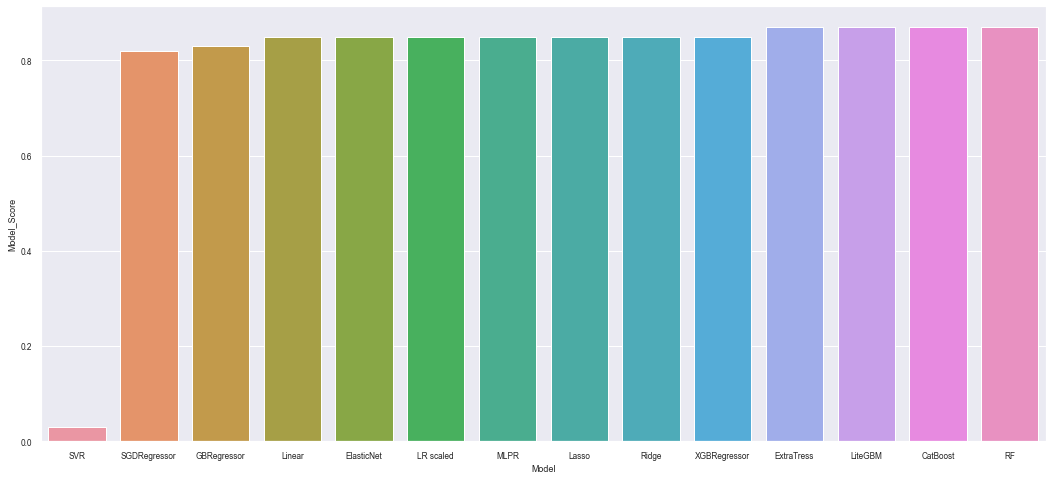

In [233]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="Model_Score", data=model_comp)
plt.show()

# RMSE Comparison

In [234]:
rmse = [lr_rmse, en_rmse, lr_scaled_rmse, svr_rmse,mlp_rmse,ls_rmse,rd_rmse,etc_rmse,xgb_rmse,sgdc_rmse,lgbm_rmse,gbc_rmse,cb_rmse,rfc_rmse]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [235]:
rmse_comp=pd.DataFrame({'Model':list_model,
                       'RMSE':rmse})

In [236]:
rmse_comp=rmse_comp.sort_values('RMSE',ascending=True)
rmse_comp

,Model,RMSE
12,CatBoost,692.992262
7,ExtraTress,702.527855
13,RF,702.774715
10,LiteGBM,712.027944
4,MLPR,752.878453
2,LR scaled,759.161652
0,Linear,759.161652
8,XGBRegressor,759.192565
6,Ridge,759.433076
1,ElasticNet,759.446499


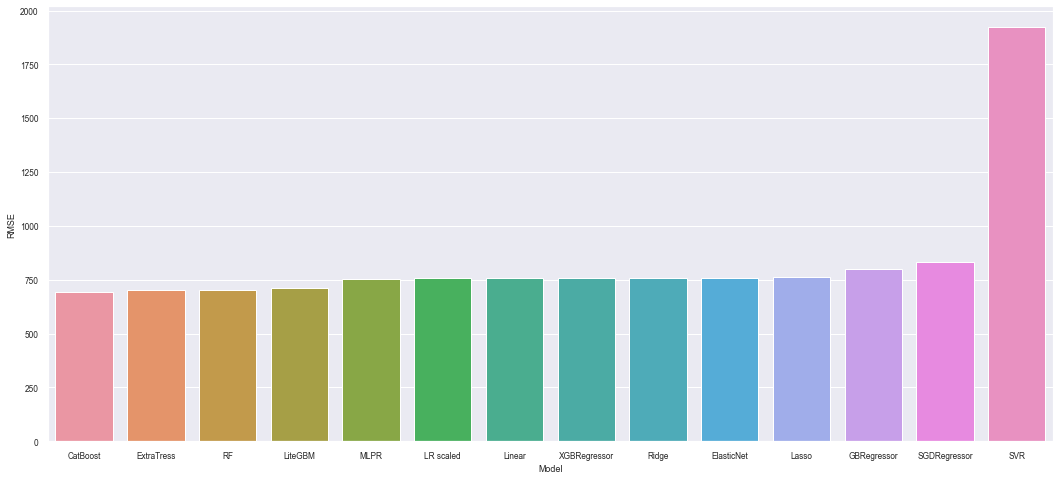

In [237]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="RMSE", data=rmse_comp)
plt.show()

# MSE Comaprison

In [238]:
model_mse = [lr_mse, en_mse, lr_scaled_mse, svr_mse,mlp_mse,ls_mse,rd_mse,etc_mse,xgb_mse,sgdc_mse,lgbm_mse,gbc_mse,cb_mse,rfc_mse]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [239]:
mse_comp=pd.DataFrame({'Model':list_model,
                      'MSE':model_mse})

In [240]:
mse_comp=mse_comp.sort_values('MSE', ascending=True)
mse_comp

,Model,MSE
12,CatBoost,4.802383e+05
7,ExtraTress,4.935454e+05
13,RF,4.938923e+05
10,LiteGBM,5.069838e+05
4,MLPR,5.668260e+05
2,LR scaled,5.763264e+05
8,XGBRegressor,5.763734e+05
6,Ridge,5.767386e+05
1,ElasticNet,5.767590e+05
5,Lasso,5.794026e+05


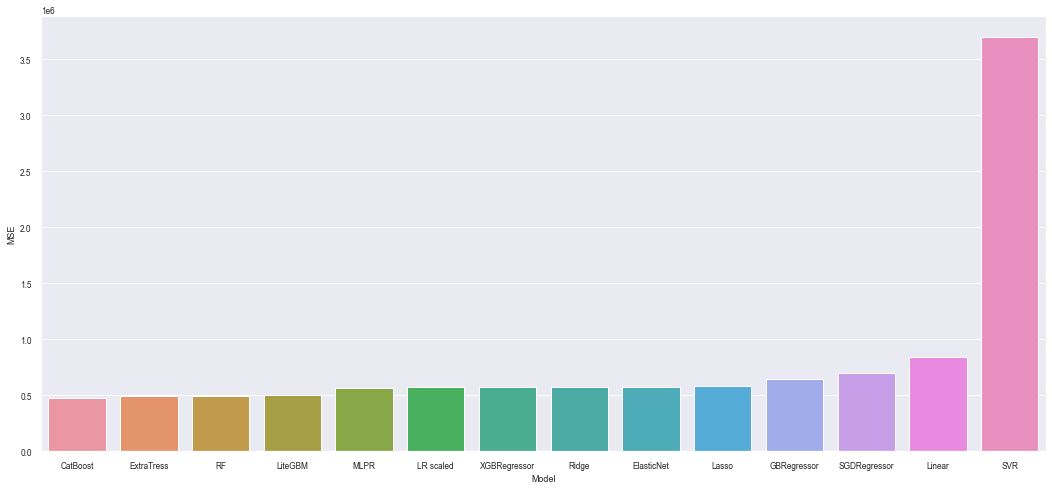

In [241]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="MSE", data=mse_comp)
plt.show()

# MAE Comparison

In [242]:
model_mae = [lr_mae, en_mae, lr_scaled_mae, svr_mae,mlp_mae,ls_mae,rd_mae,etc_mae,xgb_mae,sgdc_mae,lgbm_mae,gbc_mae,cb_mae,rfc_mae]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [243]:
mae_comp=pd.DataFrame({'Model':list_model,
                      'MAE':model_mae})

In [244]:
mae_comp=mae_comp.sort_values('MAE',ascending=True)
mae_comp

,Model,MAE
12,CatBoost,469.983175
13,RF,480.366213
7,ExtraTress,481.136735
10,LiteGBM,513.798441
4,MLPR,587.352828
11,GBRegressor,591.556960
0,Linear,592.432468
8,XGBRegressor,592.465462
6,Ridge,592.630165
1,ElasticNet,592.639416


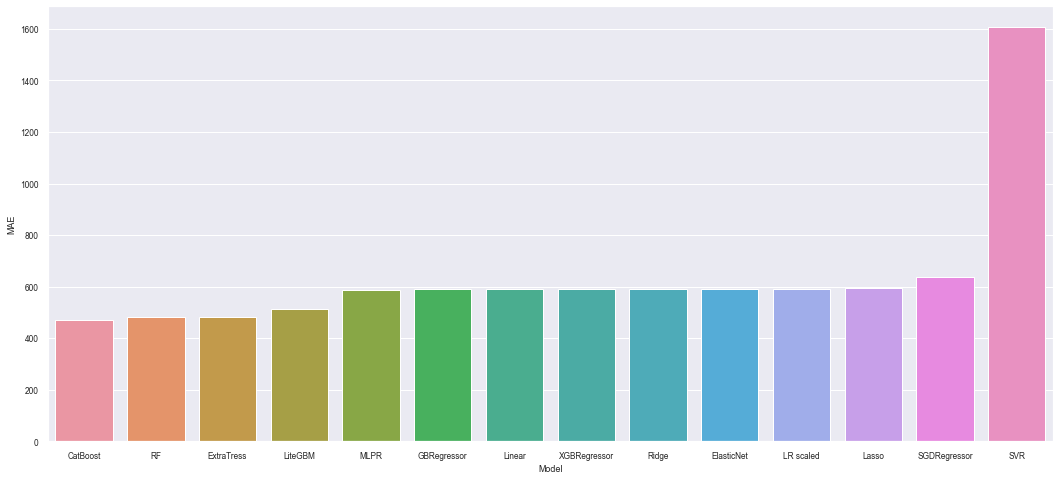

In [245]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="MAE", data=mae_comp)
plt.show()